In [52]:
from pickle import GLOBAL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
import tensorflow as tf
import csv

def main():
    path = "./Telangana_Industries_TS_IPass"
    #data = pd.read_csv("D:\Linkedin Learning\PythonTraining\Time_Series_Analysis\TS_Civil_Shop_Transactions\shop_status_details_01-01-2018 to 31-12-2018.csv")
    files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
    print('Files:',files)


    all_time_data = pd.DataFrame()

    for file in files:
        current_data = pd.read_csv(path+"/"+file)
        current_column_names = list(current_data.columns)
        if current_column_names[0] == 'district_name':
            current_data.rename(columns = {'district_name':'district',
                                           'mandal_name':'mandal',
                                           'village_name':'village',
                                           'name_of_the_unit':'unit_name',
                                           'is_online':'in_online'}, inplace = True)
        
        all_time_data = pd.concat([all_time_data, current_data])
        
    all_time_data.to_csv("all_time_data_copy.csv", index=False)
    
    #print(all_time_data.head())
    return all_time_data
if __name__ == "__main__":
    all_time_data = main()

Files: ['ts_industry_tsipass_01-01-2022_31-01-2022.csv', 'ts_industry_tsipass_01-02-2022_28-02-2022.csv', 'ts_industry_tsipass_01-03-2022_31-03-2022.csv', 'ts_industry_tsipass_01-04-2017_31-03-2018.csv', 'ts_industry_tsipass_01-04-2018_31-03-2019.csv', 'ts_industry_tsipass_01-04-2019_31-03-2020.csv', 'ts_industry_tsipass_01-04-2020_31-03-2021.csv', 'ts_industry_tsipass_01-04-2021_30-04-2021.csv', 'ts_industry_tsipass_01-04-2022_30-04-2022.csv', 'ts_industry_tsipass_01-05-2021_31-05-2021.csv', 'ts_industry_tsipass_01-05-2022_31-05-2022.csv', 'ts_industry_tsipass_01-06-2021_30-06-2021.csv', 'ts_industry_tsipass_01-06-2022_30-06-2022.csv', 'ts_industry_tsipass_01-07-2021_31-07-2021.csv', 'ts_industry_tsipass_01-07-2022_31-07-2022.csv', 'ts_industry_tsipass_01-08-2021_31-08-2021.csv', 'ts_industry_tsipass_01-09-2021_30-09-2021.csv', 'ts_industry_tsipass_01-10-2021_31-10-2021.csv', 'ts_industry_tsipass_01-11-2021_30-11-2021.csv', 'ts_industry_tsipass_01-12-2021_31-12-2021.csv']


In [16]:
import pandas as pd
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
all_time_data = pd.read_csv('all_time_data_copy.csv')

In [50]:
print(all_time_data.duplicated().count())

17282


In [8]:
all_time_data.describe()

,investment,number_of_employees
count,17282.000000,17282.000000
mean,10.028852,85.607858
std,220.522794,1756.857363
min,0.000000,0.000000
25%,0.140000,5.000000
50%,0.250000,9.000000
75%,1.029700,18.000000
max,25099.400000,187539.000000


In [9]:
all_time_data.shape

(17282, 13)

In [17]:
all_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17282 entries, 0 to 17281
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   district                    17282 non-null  object 
 1   mandal                      17282 non-null  object 
 2   village                     17282 non-null  object 
 3   unit_name                   17282 non-null  object 
 4   line_of_activity            17282 non-null  object 
 5   sector                      17279 non-null  object 
 6   investment                  17282 non-null  float64
 7   number_of_employees         17282 non-null  int64  
 8   application_date            17282 non-null  object 
 9   approval_date               17282 non-null  object 
 10  progress_of_implementation  17282 non-null  object 
 11  in_online                   17282 non-null  object 
 12  social_status               17282 non-null  object 
dtypes: float64(1), int64(1), object

In [11]:
all_time_data.describe( )

,investment,number_of_employees
count,17282.000000,17282.000000
mean,10.028852,85.607858
std,220.522794,1756.857363
min,0.000000,0.000000
25%,0.140000,5.000000
50%,0.250000,9.000000
75%,1.029700,18.000000
max,25099.400000,187539.000000


In [25]:
all_time_data.loc[all_time_data['sector'].isnull()]

,district,mandal,village,unit_name,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,in_online,social_status
132,Medchal,Shamirpet,Turkapally,Crescentia Labs Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,6.39,20,01/01/2022,20/01/2022,Yet to Start Construction,Yes,General
14598,Karimnagar,Karimnagar,Durshed,M/s. SRI VENKATESHWARA GODOWNS,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.25,12,30/05/2022,24/06/2022,Yet to Start Construction,Yes,OBC
17018,Medchal,Shamirpet,Kolthur,G.V. Research Centers Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.50,10,16/02/2021,17/12/2021,Yet to Start Construction,Yes,General


In [29]:
all_time_data = all_time_data.dropna()

In [31]:
all_time_data.isnull( ).sum( )

district                      0
mandal                        0
village                       0
unit_name                     0
line_of_activity              0
sector                        0
investment                    0
number_of_employees           0
application_date              0
approval_date                 0
progress_of_implementation    0
in_online                     0
social_status                 0
dtype: int64

In [14]:
all_time_data.nunique()

district                         36
mandal                          548
village                        3302
unit_name                     15781
line_of_activity                270
sector                           20
investment                     4107
number_of_employees             283
application_date               2076
approval_date                  1783
progress_of_implementation        5
in_online                         1
social_status                     4
dtype: int64

In [15]:
data_cols = list(all_time_data.columns)
data_cols

['district',
 'mandal',
 'village',
 'unit_name',
 'line_of_activity',
 'sector',
 'investment',
 'number_of_employees',
 'application_date',
 'approval_date',
 'progress_of_implementation',
 'in_online',
 'social_status']

In [16]:

all_time_data['application_date'] = pd.to_datetime(all_time_data['application_date'])
all_time_data['approval_date'] = pd.to_datetime(all_time_data['approval_date'])

print(all_time_data.dtypes)
#all_time_data['number_of_employees'] = pd.to_numeric(all_time_data['number_of_employees'])



district                              object
mandal                                object
village                               object
unit_name                             object
line_of_activity                      object
sector                                object
investment                           float64
number_of_employees                    int64
application_date              datetime64[ns]
approval_date                 datetime64[ns]
progress_of_implementation            object
in_online                             object
social_status                         object
dtype: object


In [17]:
all_time_data.sort_values(by='application_date', inplace=True)
all_time_data['Year'] = pd.to_datetime(all_time_data['application_date']).dt.year
all_time_data.head()

,district,mandal,village,unit_name,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,in_online,social_status,Year
2935,Peddapalli,Dharmaram,Myadaram,M/S.SRI ANABHASKARA AGRO FARMS PVT LTD,Stone crushers,Granite and Stone Crushing,0.270,15,2016-01-07,2017-08-22,COMMENCED OPERATIONS,Yes,OBC,2016
2679,Rangareddy,Nandigama,Chegur,M/s. MAHALAKSHMI ALLOYS & METALS PVT. LTD,Ferrous and Non- ferrous metal extraction invo...,Engineering,1.200,50,2016-01-07,2017-08-22,COMMENCED OPERATIONS,Yes,General,2016
8934,Karimnagar,Karimnagar,Asifnagar,M/S.NEW KARIMNAGAR STONE CRUSHER,Stone crushers,Granite and Stone Crushing,0.250,30,2016-01-08,2019-06-29,COMMENCED OPERATIONS,Yes,General,2016
2735,Nalgonda,Kattangoor,Munukuntla,Narbheram Vishram,Solar power generation through solar photovolt...,Solar and Other Renewable Energy,113.250,30,2016-01-09,2017-08-22,COMMENCED OPERATIONS,Yes,General,2016
2934,Khammam,Tallada,Annargudem,M/S. MSR CONSTRUCTIONS,Stone crushers,Granite and Stone Crushing,4.983,16,2016-01-09,2017-08-22,COMMENCED OPERATIONS,Yes,General,2016


In [18]:
#data_frame_with_only_values = all_time_data.loc[all_time_data['district_name'].notnull()]
#print(data_frame_with_only_values['Year'])
#print(all_time_data.loc[15457])

#### What's the total investment in Telangana annually ?

In [19]:
all_time_data.groupby(['Year']).sum()

,investment,number_of_employees
Year,,
2016,6301.4626,33965
2017,51973.3460,250698
2018,42393.3583,668681
2019,15744.5405,311201
2020,30342.4432,83972
2021,15268.9941,86099
2022,11294.4759,44859


In [ ]:
import matplotlib.pyplot as plt

years = range(2016,2023)
print(years)

plt.bar(years,all_time_data.groupby(['Year']).sum()['investment'])
plt.xticks(years)
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('Year')
plt.show()

#### What's the average investment District wise in Telangana ?

In [47]:
all_time_data.groupby(['district']).median().sort_values(by=['investment'])

,investment,number_of_employees,Year,Time Taken
district,,,,
Adilabad,0.07000,5.0,2020.0,8.0
Asifabad,0.15500,8.0,2020.0,8.5
BHADRADRI KOTHAGUDEM,0.16500,9.0,2018.0,11.0
Bhadradri Kothagudem,0.16500,6.0,2021.0,9.0
Bhupalpally,0.12500,6.0,2020.0,10.0
Gadwal,0.59000,10.0,2020.0,24.0
Hanumakonda,0.38000,6.0,2022.0,18.0
Hyderabad,0.25000,34.5,2019.0,6.5
Jagtial,0.15000,4.0,2020.0,11.0


#### Total number of units setup social status wise in Telangana ?

In [57]:
all_time_data.groupby(['social_status']).count()

,district,mandal,village,unit_name,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,in_online,Year,Time Taken
social_status,,,,,,,,,,,,,,
General,10201,10201,10201,10201,10201,10199,10201,10201,10201,10201,10201,10201,10201,10201
OBC,5781,5781,5781,5781,5781,5780,5781,5781,5781,5781,5781,5781,5781,5781
SC,680,680,680,680,680,680,680,680,680,680,680,680,680,680
ST,620,620,620,620,620,620,620,620,620,620,620,620,620,620


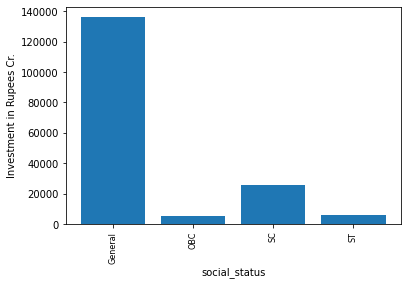

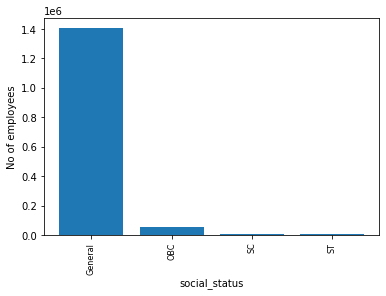

In [22]:
social_status_keys = [status for status, all_time_data in all_time_data.groupby(['social_status'])]

plt.bar(social_status_keys,all_time_data.groupby(['social_status']).sum()['investment'])
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('social_status')
plt.xticks(social_status_keys, rotation='vertical', size=8)
plt.show()

plt.bar(social_status_keys,all_time_data.groupby(['social_status']).sum()['number_of_employees'])
plt.ylabel('No of employees')
plt.xlabel('social_status')
plt.xticks(social_status_keys, rotation='vertical', size=8)
plt.show()

####  Time Taken to approve any application using IPASS ?

In [23]:
all_time_data['application_date'] = pd.to_datetime(all_time_data['application_date'])
all_time_data['approval_date'] = pd.to_datetime(all_time_data['approval_date'])

all_time_data['Time Taken'] = all_time_data['approval_date']-all_time_data['application_date']
all_time_data['Time Taken'] = all_time_data['Time Taken'].dt.days.astype('int64')
all_time_data.tail()

,district,mandal,village,unit_name,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,in_online,social_status,Year,Time Taken
15270,Medchal,Shamirpet,Devaryamjal,Barenkabavi Vishnuvardhan Reddy,"Chilling plant, cold storage and ice making",Agro based incl Cold Storages,0.19,20,2022-12-07,2022-07-23,Yet to Start Construction,Yes,General,2022,-137
15392,Jangaon,Raghunathpalle,Govardhanagiri,SHAKTI MILK AND MILK PRODUCTS,Milk processes and dairyproducts(integrated pr...,Food Processing,2.49,100,2022-12-07,2022-12-07,Yet to Start Construction,Yes,General,2022,0
15249,Jangaon,Palakurthy,Palakurthy,LAXMI NARSIMHA STONE CRUSHER,Stone crushers,Granite and Stone Crushing,0.47,15,2022-12-07,2022-07-25,Yet to Start Construction,Yes,General,2022,-135
15320,Nizamabad,Bodhan,Taggelli,M/s RAHEEL FOODS AND CATERING SERVICES,Rice mill (Rice hullers only),Food Processing,0.17,10,2022-12-07,2022-07-18,Yet to Start Construction,Yes,OBC,2022,-142
15357,Sangareddy,Patancheru,Pashamylaram,VAJRA TRANSPOWER PRIVATE LIMITED,Transformer repairing/ manufacturing( dry proc...,Electrical and Electronic Products,0.90,19,2022-12-07,2022-07-15,Yet to Start Construction,Yes,General,2022,-145


In [38]:
Time_taken_genuine = all_time_data[all_time_data['Time Taken']>0]
Time_taken_genuine.shape

(12442, 15)

<AxesSubplot:xlabel='application_date', ylabel='Time Taken'>

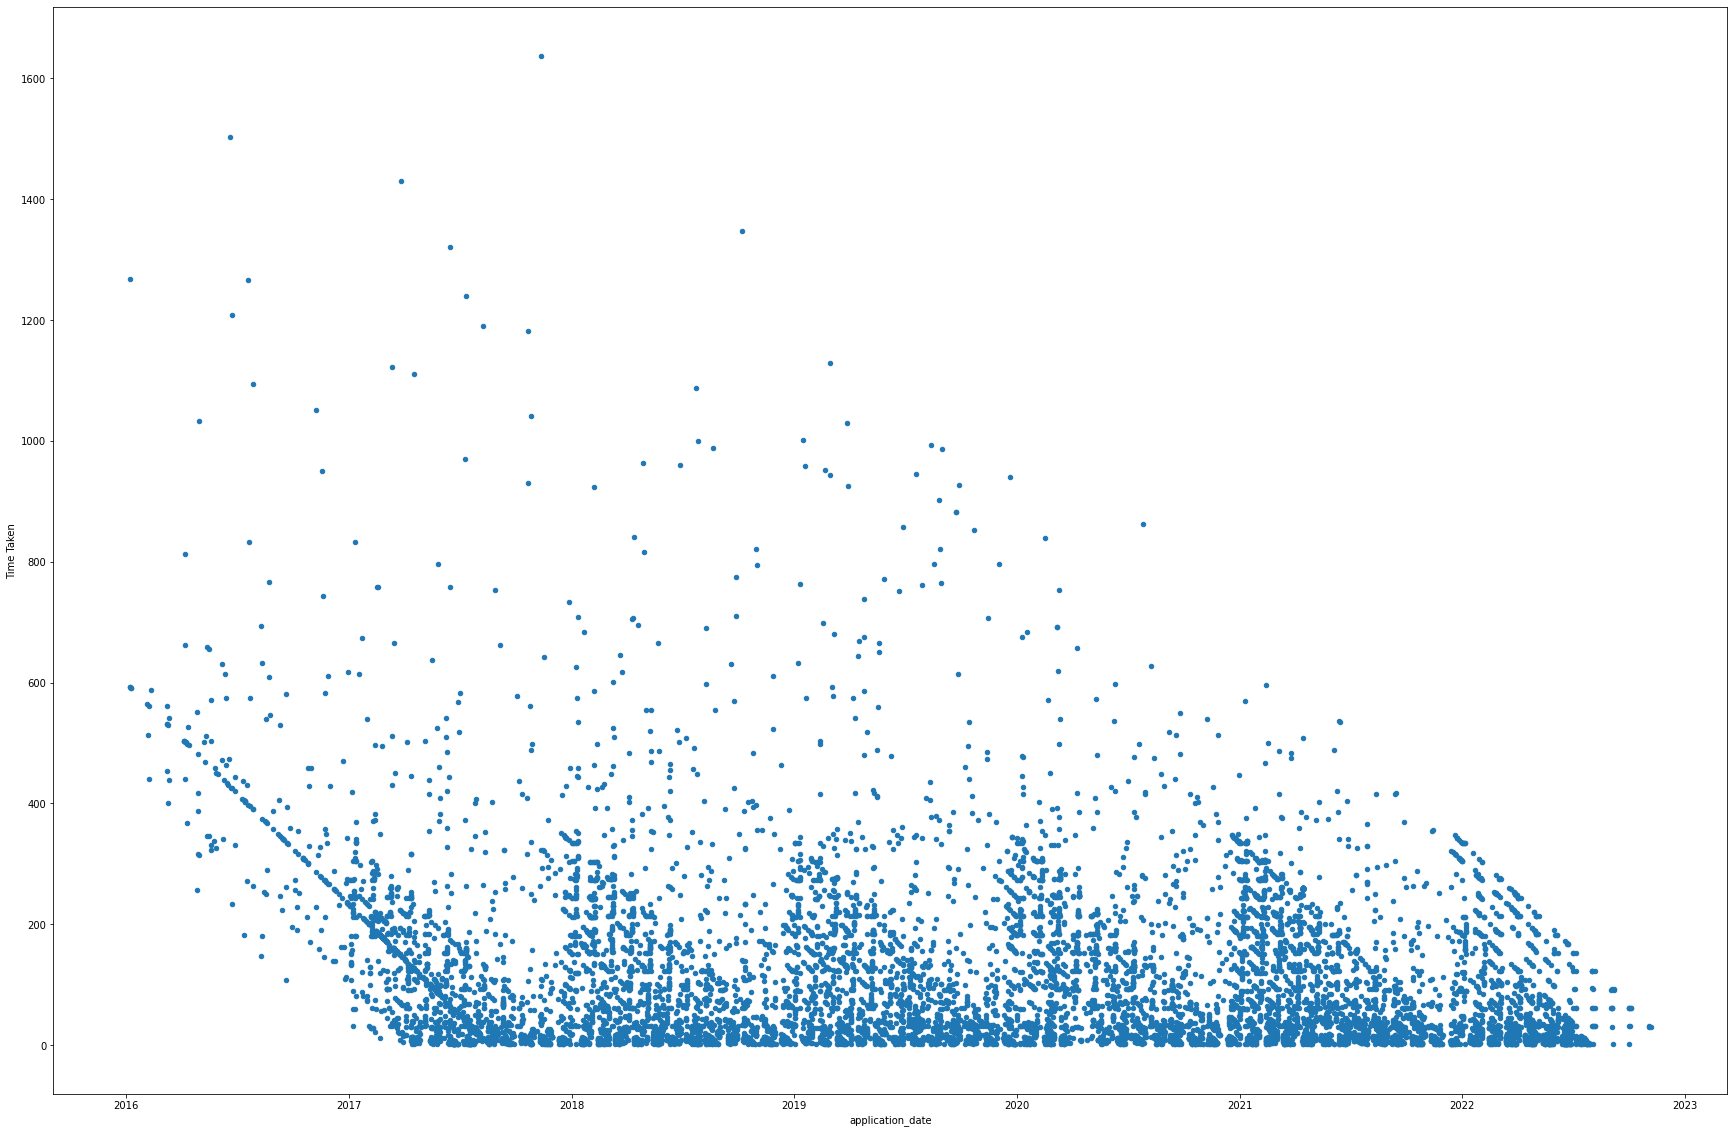

In [59]:
Time_taken_genuine[['application_date','Time Taken']].plot(kind='scatter',x='application_date',y='Time Taken', figsize=(30,20))

In [26]:
nan_df = all_time_data[all_time_data['sector'].isna()]
display(nan_df.head())

,district,mandal,village,unit_name,line_of_activity,sector,investment,number_of_employees,application_date,approval_date,progress_of_implementation,in_online,social_status,Year,Time Taken
17018,Medchal,Shamirpet,Kolthur,G.V. Research Centers Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.50,10,2021-02-16,2021-12-17,Yet to Start Construction,Yes,General,2021,304
132,Medchal,Shamirpet,Turkapally,Crescentia Labs Private Limited,"Industrial estates/ parks/ complexes/ areas, E...",NaN,6.39,20,2022-01-01,2022-01-20,Yet to Start Construction,Yes,General,2022,19
14598,Karimnagar,Karimnagar,Durshed,M/s. SRI VENKATESHWARA GODOWNS,"Industrial estates/ parks/ complexes/ areas, E...",NaN,0.25,12,2022-05-30,2022-06-24,Yet to Start Construction,Yes,OBC,2022,25


#### What's the average investment sector wise in Telangana ?

In [48]:
all_time_data.groupby(['sector']).median()

,investment,number_of_employees,Year,Time Taken
sector,,,,
Aerospace and Defence,2629.00000,5000.0,2017.0,251.0
Agro based incl Cold Storages,0.20000,5.0,2020.0,10.0
Automobile,0.75000,9.0,2020.5,32.5
Beverages,0.12000,4.0,2019.0,9.0
"Cement, Cement & Concrete Products, Fly Ash Bricks",0.17000,8.0,2020.0,10.0
Electrical and Electronic Products,0.85000,18.0,2019.0,16.0
Engineering,0.24500,7.0,2019.0,12.0
"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",0.60000,10.0,2020.0,21.5
Food Processing,0.25000,8.0,2020.0,13.0


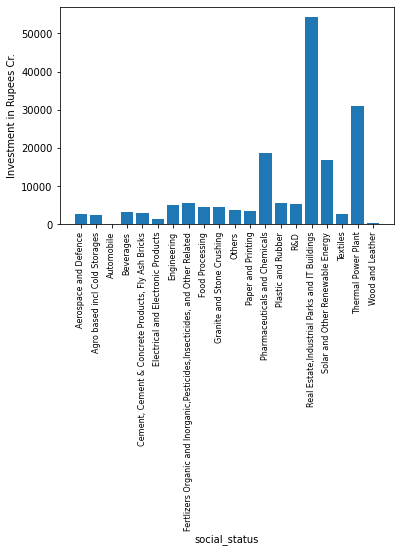

In [27]:
all_time_data.groupby(['sector']).sum()

sector_keys = [status for status, all_time_data in all_time_data.groupby(['sector'])]

plt.bar(sector_keys,all_time_data.groupby(['sector']).sum()['investment'])
plt.ylabel('Investment in Rupees Cr.')
plt.xlabel('social_status')
plt.xticks(sector_keys, rotation='vertical', size=8)
plt.show()

In [28]:
all_time_data.dtypes

district                              object
mandal                                object
village                               object
unit_name                             object
line_of_activity                      object
sector                                object
investment                           float64
number_of_employees                    int64
application_date              datetime64[ns]
approval_date                 datetime64[ns]
progress_of_implementation            object
in_online                             object
social_status                         object
Year                                   int64
Time Taken                             int64
dtype: object

<AxesSubplot:xlabel='sector'>

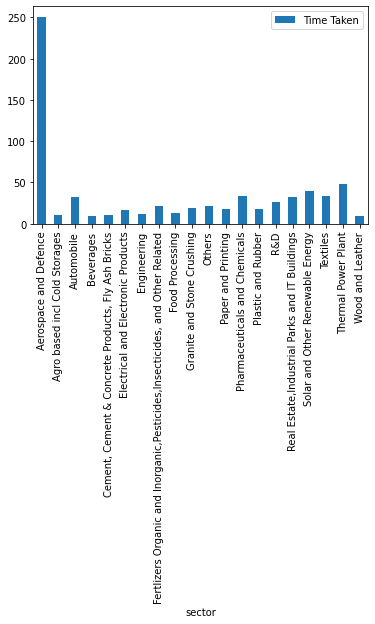

In [62]:
time_taken_for_sector_approval = all_time_data[["sector","application_date", "Time Taken","progress_of_implementation"]]
time_taken_for_sector_approval.groupby(['sector']).median().plot.bar()

In [30]:
all_time_data.groupby(['sector']).sector.count().sort_values()

sector
Aerospace and Defence                                                             1
Thermal Power Plant                                                               5
Automobile                                                                       16
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related     136
Solar and Other Renewable Energy                                                145
Real Estate,Industrial Parks and IT Buildings                                   158
R&D                                                                             288
Electrical and Electronic Products                                              315
Wood and Leather                                                                363
Beverages                                                                       452
Others                                                                          490
Paper and Printing                                                   

In [31]:
all_time_data.groupby(['sector','progress_of_implementation']).sector.head()

2935           Granite and Stone Crushing
2679                          Engineering
8934           Granite and Stone Crushing
2735     Solar and Other Renewable Energy
2934           Granite and Stone Crushing
                       ...               
15273                          Automobile
837      Solar and Other Renewable Energy
13501                          Automobile
14598                                 NaN
14741                          Automobile
Name: sector, Length: 437, dtype: object

In [32]:
highest_employment_per_sector_progress =  all_time_data.groupby(['sector', 'progress_of_implementation']).apply(lambda df: df.loc[df.number_of_employees.idxmax()])
highest_employment_per_sector_progress.sort_values(by='number_of_employees',ascending=False)

district  \
sector                                        progress_of_implementation                     
Textiles                                      COMMENCED OPERATIONS        Warangal - Rural   
Real Estate,Industrial Parks and IT Buildings ADVANCED STAGE                    Rangareddy   
                                              INITIAL STAGE                     Rangareddy   
                                              COMMENCED OPERATIONS              Rangareddy   
Others                                        COMMENCED OPERATIONS              Sangareddy   
...                                                                                    ...   
Solar and Other Renewable Energy              INITIAL STAGE                      Vikarabad   
Thermal Power Plant                           YET TO START CONSTRUCTION           Suryapet   
Beverages                                     YET TO START CONSTRUCTION            Jagtial   
Automobile                                    YET TO START CONSTRUCTION            Yadadri   
                                              ADVANCED STAGE                        Nirmal   

                                                                                   mandal  \
sector                                        progress_of_implementation                    
Textiles                                      COMMENCED OPERATIONS             Geesugonda   
Real Estate,Industrial Parks and IT Buildings ADVANCED STAGE              Serilingampally   
                                              INITIAL STAGE               Serilingampally   
                                              COMMENCED OPERATIONS        Serilingampally   
Others                                        COMMENCED OPERATIONS             Patancheru   
...                                                                                   ...   
Solar and Other Renewable Energy              INITIAL STAGE                         Pargi   
Thermal Power Plant                           YET TO START CONSTRUCTION      Mattam Palle   
Beverages                                     YET TO START CONSTRUCTION        Sarangapur   
Automobile                                    YET TO START CONSTRUCTION      M.Turkapalle   
                                              ADVANCED STAGE                     Khanapur   

                                                                               village  \
sector                                        progress_of_implementation                 
Textiles                                      COMMENCED OPERATIONS           Shayampet   
Real Estate,Industrial Parks and IT Buildings ADVANCED STAGE                  MADHAPUR   
                                              INITIAL STAGE               NANAKRAMGUDA   
                                              COMMENCED OPERATIONS          GOPANPALLE   
Others                                        COMMENCED OPERATIONS           Sultanpur   
...                                                                                ...   
Solar and Other Renewable Energy              INITIAL STAGE                     Naskal   
Thermal Power Plant                           YET TO START CONSTRUCTION     Mattapalle   
Beverages                                     YET TO START CONSTRUCTION       Potharam   
Automobile                                    YET TO START CONSTRUCTION    Rusta Puram   
                                              ADVANCED STAGE                  Khanapur   

                                                                                                     unit_name  \
sector                                        progress_of_implementation                                         
Textiles                                      COMMENCED OPERATIONS                  Kakatiya Mega Textile Park   
Real Estate,Industrial Parks and IT Buildings ADVANCED STAGE                         M/s. VITP PRIVATE LIMITED   
                      

In [33]:
max_investment_per_sector_progress = all_time_data.groupby(['sector', 'progress_of_implementation']).apply(lambda df: df.loc[df.investment.idxmax()])
max_investment_per_sector_progress.sort_values(by='investment',ascending=False)

district  \
sector                                             progress_of_implementation                         
Thermal Power Plant                                INITIAL STAGE                           Nalgonda   
Real Estate,Industrial Parks and IT Buildings      INITIAL STAGE                         Rangareddy   
                                                   ADVANCED STAGE                        Rangareddy   
Thermal Power Plant                                COMMENCED OPERATIONS        BHADRADRI KOTHAGUDEM   
Fertlizers Organic and Inorganic,Pesticides,Ins... ADVANCED STAGE                        Peddapalli   
...                                                                                             ...   
R&D                                                YET TO START CONSTRUCTION             Sangareddy   
Beverages                                          INITIAL STAGE                           Siddipet   
Automobile                                         YET TO START CONSTRUCTION                Yadadri   
Wood and Leather                                   YET TO START CONSTRUCTION              Nizamabad   
Automobile                                         ADVANCED STAGE                            Nirmal   

                                                                                     mandal  \
sector                                             progress_of_implementation                 
Thermal Power Plant                                INITIAL STAGE               Dameracherla   
Real Estate,Industrial Parks and IT Buildings      INITIAL STAGE                 Maheswaram   
                                                   ADVANCED STAGE                    Shabad   
Thermal Power Plant                                COMMENCED OPERATIONS           Palwancha   
Fertlizers Organic and Inorganic,Pesticides,Ins... ADVANCED STAGE                Ramagundam   
...                                                                                     ...   
R&D                                                YET TO START CONSTRUCTION     Patancheru   
Beverages                                          INITIAL STAGE                  Jagdevpur   
Automobile                                         YET TO START CONSTRUCTION   M.Turkapalle   
Wood and Leather                                   YET TO START CONSTRUCTION      Dichpalle   
Automobile                                         ADVANCED STAGE                  Khanapur   

                                                                                    village  \
sector                                             progress_of_implementation                 
Thermal Power Plant                                INITIAL STAGE                Veerlapalem   
Real Estate,Industrial Parks and IT Buildings      INITIAL STAGE                 Maheswaram   
                                                   ADVANCED STAGE              Chandenvalle   
Thermal Power Plant                                COMMENCED OPERATIONS           Palwancha   
Fertlizers Organic and Inorganic,Pesticides,Ins... ADVANCED STAGE                Ramagundam   
...                                                                                     ...   
R&D                                                YET TO START CONSTRUCTION      Nandigaon   
Beverages                                          INITIAL STAGE                  Thimmapur   
Automobile                                         YET TO START CONSTRUCTION    Rusta Puram   
Wood and Leather                                   YET TO START CONSTRUCTION       Bardipur   
Automobile                                         ADVANCED STAGE                  Khanapur   

                                                                                                                      unit_name  \
sector                                             progress_of_implementation                                                     
Thermal Power Pla

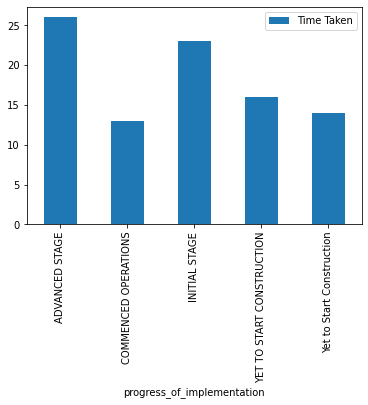

In [34]:
current_status = time_taken_for_sector_approval.groupby(['progress_of_implementation']).median().plot.bar()

In [35]:
all_time_data.progress_of_implementation.value_counts()

COMMENCED OPERATIONS         9351
Yet to Start Construction    5334
ADVANCED STAGE                961
INITIAL STAGE                 829
YET TO START CONSTRUCTION     807
Name: progress_of_implementation, dtype: int64

<AxesSubplot:xlabel='district'>

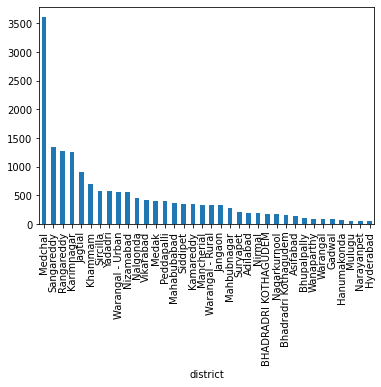

In [36]:
all_time_data.groupby(['district']).district.count().sort_values(ascending=False).plot.bar()